In [2]:
import scipy.stats as sps
import numpy as np
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
eps = sps.norm(0, 0.2).rvs(size=500)
X = np.linspace(-8, 8, 500)
Y = 0.5*X + 1 + eps

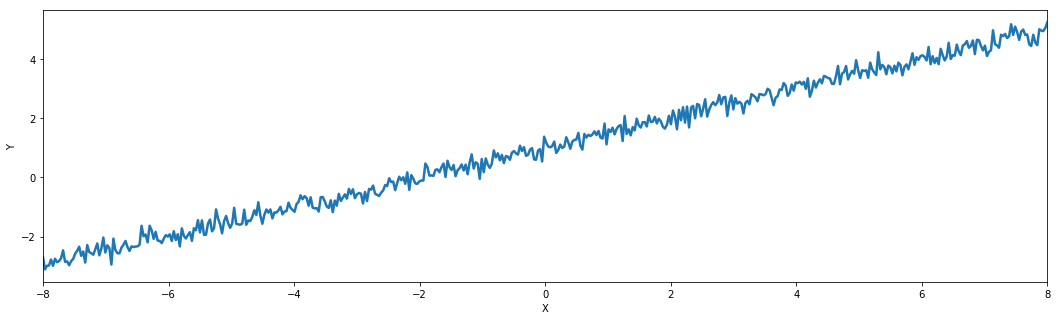

In [4]:
plt.figure(figsize = (18,5))
plt.plot(X, Y, linewidth = 2.5)
plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
def mse_fun((k, b)): return np.array([(Y[i] - k*X[i] - b)**2 for i in range(len(X))]).mean()
y_opt = scipy.optimize.minimize(mse_fun, (0, 0))

In [6]:
print y_opt.x

[ 0.49890987  1.0053833 ]


In [7]:
x_rec = np.linspace(-8, 8, 500)
y_rec = y_opt.x[0]*x_rec + y_opt.x[1]

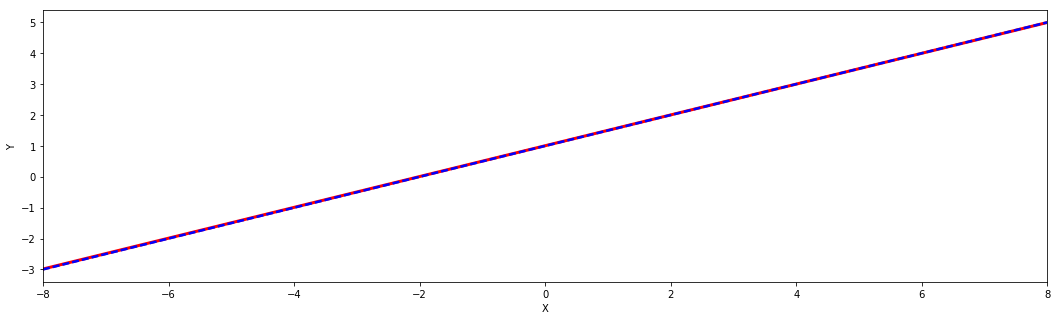

In [8]:
plt.figure(figsize = (18,5))
plt.plot(x_rec, y_rec, linewidth = 3, color = 'r')

x = np.linspace(-8, 8, 500)
y = 0.5 * x + 1

plt.plot(x, y, 'r--', linewidth=2.5, label = '0.5x + 1', color = 'b')

plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
eps_add = sps.norm(0, 0.2).rvs(size=75) 
x_add = np.linspace(-8, 8, 75)
y_add = -1 + eps_add
X_full = np.concatenate((X, x_add))
Y_full = np.concatenate((Y, y_add))

In [12]:
def full_mse_fun((k, b)): return np.array([(Y_full[i] - k*X_full[i] - b)**2 for i in range(len(X_full))]).mean()
y_full_mse = scipy.optimize.minimize(full_mse_fun, (0, 0))
def full_mae_fun((k, b)): return np.array([np.abs(Y_full[i] - k*X_full[i] - b) for i in range(len(X_full))]).mean()
y_full_mae = scipy.optimize.minimize(full_mae_fun, (0, 0)) 
print y_full_mse.x, y_full_mae.x

[ 0.43058724  0.74044168] [ 0.49791484  0.98534701]


In [16]:
X = [(0, 1), (1, 2), (2, 2), (10, 7), (19, 12)]
for x in X:
    y_full_mse = scipy.optimize.minimize(full_mse_fun, x)
    y_full_mae = scipy.optimize.minimize(full_mae_fun, x) 
    print y_full_mse.x, y_full_mae.x

[ 0.43058725  0.74044168] [ 0.49779887  0.98575058]
[ 0.43058719  0.74044144] [ 0.49769413  0.98632654]
[ 0.43058735  0.74044123] [ 0.49765713  0.98653   ]
[ 0.43058734  0.74044134] [ 0.4978923   0.98524187]
[ 0.43058719  0.74044245] [ 0.49785866  0.9854218 ]


# Как видно, независимо от начального приближения, значания mse и mae получаются приблизительно одни и те же

In [158]:
x_full_mse_rec = np.linspace(-8, 8, 575)
y_full_mse_rec = y_full_mse.x[0]*x_full_mse_rec + y_full_mse.x[1]

In [160]:
x_full_mae_rec = np.linspace(-8, 8, 575)
y_full_mae_rec = y_full_mae.x[0]*x_full_mae_rec + y_full_mae.x[1]

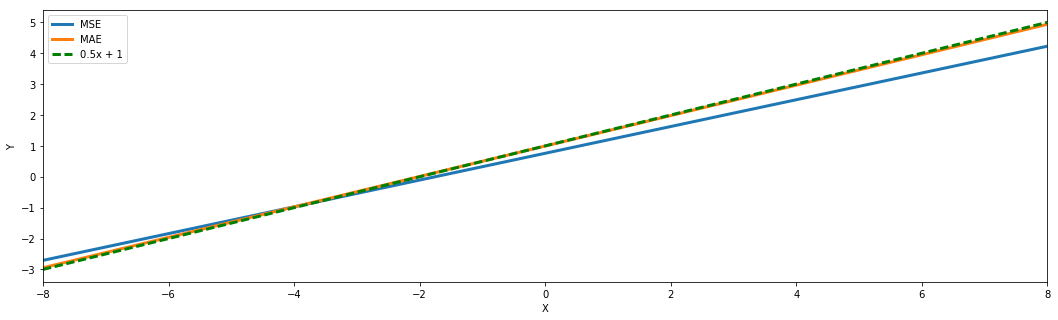

In [178]:
plt.figure(figsize = (18,5))
plt.plot(x_full_mse_rec, y_full_mse_rec, linewidth=3, label = 'MSE')
plt.plot(x_full_mae_rec, y_full_mae_rec, linewidth=3, label = 'MAE')

plt.plot(x, y, 'r--', linewidth=3, label = '0.5x + 1', color = 'g')

plt.legend()
plt.xlim(-8,8)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

В модели, оптимизирующей MAE, даже в случае, когда выбросов достаточно много (но, хотя бы половина объектов - не выбросы), то медиана остается среди объектов не являющихся выбросами.
В модели, оптимизирующей MSE, же, даже если малое число объектов - выбросы (хотя бы 1, достаточно большой), среднее достаточно сильно изменится. 
Соответсвенно ...
# Вывод: модель, оптимизирующая MAE, более устойчива к выбросам, чем модель, оптимизирующая MSE.